In [1]:
import pandas as pd

# Load and preprocess data
train_file = '../data/train.csv'
df = pd.read_csv(train_file)
df

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3
...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2
17303,ffddf1f,Technology has changed a lot of ways that we l...,4
17304,fff016d,If you don't like sitting around all day than ...,2
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1


   score  avg_word_length
0      1         5.098321
1      2         5.071671
2      3         5.146123
3      4         5.225773
4      5         5.332527
5      6         5.462684


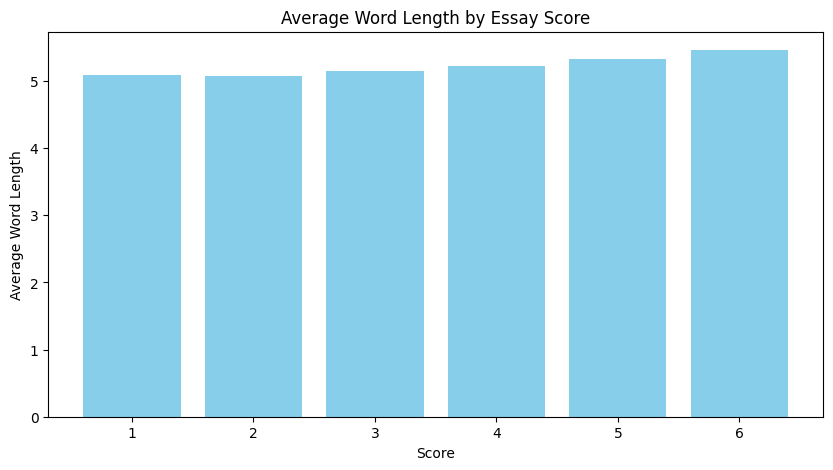

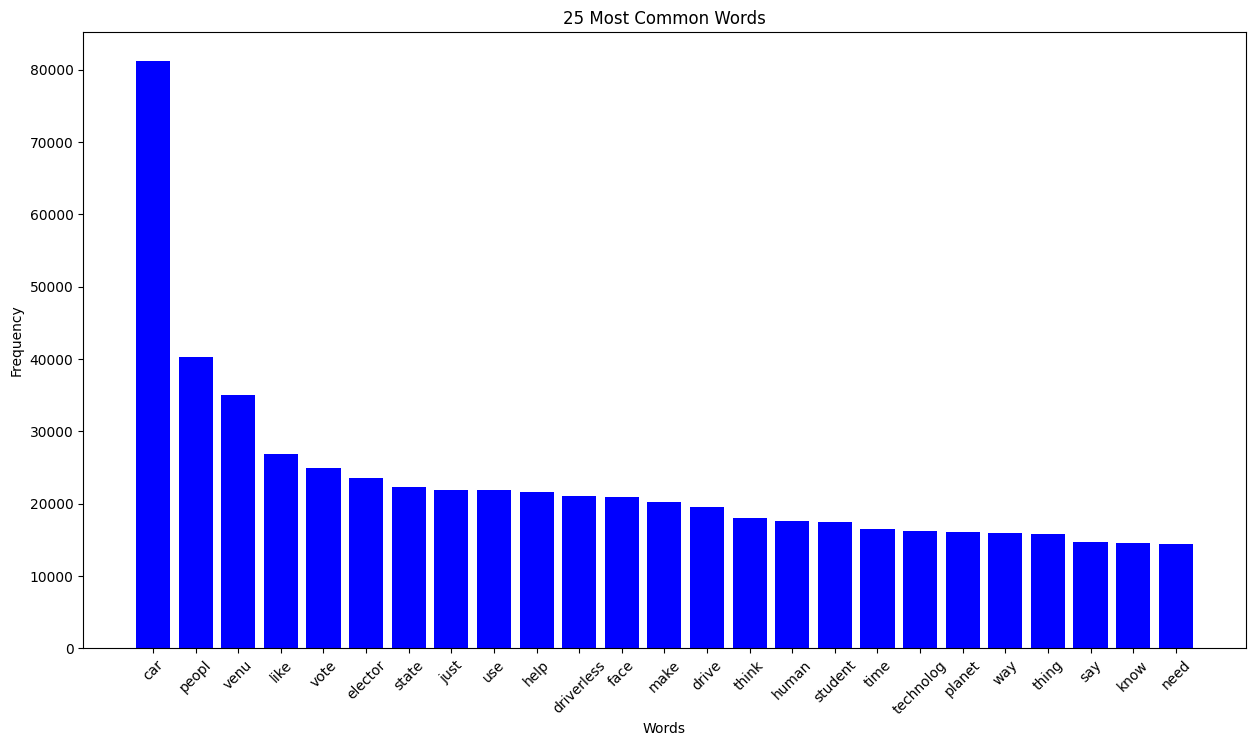

In [2]:
import nltk

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import punkt
import re
import string
import numpy as np
from scipy import stats

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
from nltk import FreqDist

def comprehensive_text_preprocessing(text):
    # Lowercase and remove HTML tags
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words]

    return " ".join(words)  # Return the processed text

def average_word_length(text):
    words = text.split()  # Split the text into words
    if not words:
        return 0  # Avoid division by zero if there are no words
    total_length = sum(len(word) for word in words)
    return total_length / len(words)

def calculate_word_lengths(text):
    words = word_tokenize(text)
    return [len(word) for word in words]

# Applying the comprehensive_text_preprocessing to the 'full_text' column
df['processed_text'] = df['full_text'].apply(comprehensive_text_preprocessing)

# Calculating average word length
df['avg_word_length'] = df['processed_text'].apply(average_word_length)
# Assuming your DataFrame is already loaded and named df
# Calculate word lengths for each essay
df['word_lengths'] = df['processed_text'].apply(calculate_word_lengths)
# Group by 'score' and calculate the mean of 'avg_word_length' for each score
average_lengths_by_score = df.groupby('score')['avg_word_length'].mean().reset_index()

# Collect all word lengths by score
word_lengths_by_score = {score: [] for score in df['score'].unique()}
for index, row in df.iterrows():
    word_lengths_by_score[row['score']].extend(row['word_lengths'])

# Print the results
print(average_lengths_by_score)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar(average_lengths_by_score['score'], average_lengths_by_score['avg_word_length'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Average Word Length')
plt.title('Average Word Length by Essay Score')
plt.xticks(average_lengths_by_score['score'])  # Set x-ticks to be the scores
plt.show()

# Assuming 'processed_text' is a column where text is already tokenized and cleaned
all_words = [word for text in df['processed_text'] for word in word_tokenize(text)]
freq_dist = FreqDist(all_words)

# Get the 25 most common words
most_common_words = freq_dist.most_common(25)

# Extracting words and their counts for plotting
words, counts = zip(*most_common_words)


plt.figure(figsize=(15, 8))
plt.bar(words, counts, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('25 Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [3]:
df['avg_word_length']

0        5.082251
1        4.887931
2        5.158140
3        5.484716
4        5.642045
           ...   
17302    5.191176
17303    5.311594
17304    4.840000
17305    5.680328
17306    4.592593
Name: avg_word_length, Length: 17307, dtype: float64

# Train Test Split / AVG Word Length

In [8]:
# Example: Include word frequency as a feature
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()
X_word_freq = vectorizer.fit_transform(df['processed_text'])

X_avg_word_length = df['avg_word_length'].values.reshape(-1, 1)

# Combine word frequency with average word length
X_combined = np.hstack((X_avg_word_length, X_word_freq.toarray()))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression();
lin_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lin_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.1576991823675677


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
